In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_4378.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_747.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_561.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_345.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3019.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_2566.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3156.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3889.jpg
/kaggle/input/human-action-recognition-har-dataset

In [2]:
# Loading the training and testing data into data frames

training_set = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv")
testing_set = pd.read_csv("../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv")

In [3]:
training_set

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [4]:
training_set.dtypes

filename    object
label       object
dtype: object

In [5]:
training_set.isnull().sum()

filename    0
label       0
dtype: int64

In [6]:
testing_set

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
5395,Image_5396.jpg
5396,Image_5397.jpg
5397,Image_5398.jpg
5398,Image_5399.jpg


### There are 12 600 images in the training set and 5400 images in the testing set.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

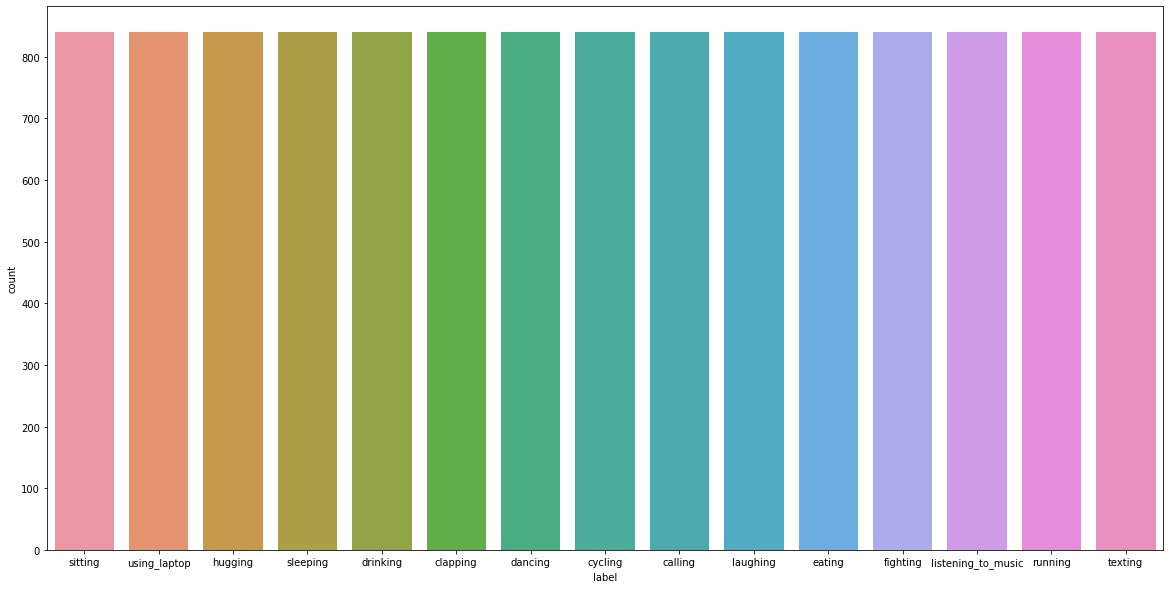

In [7]:
# Plotting the data distribution across the 15 classes in the training set

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(training_set.label)

In [8]:
counts = training_set['label'].value_counts()
print(counts)

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64


### There are 840 labelled images in each class in the training set.

In [9]:
# Loading the training set images into an array
# Decided to load the images in as 150 x 150 pixels arbitrarily

from tensorflow.keras.preprocessing.image import img_to_array, load_img

img_data = []
img_label = []

for i in range(len(training_set)):
    img = "../input/human-action-recognition-har-dataset/Human Action Recognition/train/" + training_set["filename"][i]
    img = load_img(img, target_size=(150, 150))
    img = img_to_array(img)
    img_data.append(img)
    img_label.append(training_set["label"][i])

In [10]:
img_data = np.array(img_data)
print(img_data.shape)

(12600, 150, 150, 3)


In [11]:
img_label = np.array(img_label)
print(img_label.shape)

(12600,)


In [12]:
# Define a function to randomly display training set images
# Code from https://www.kaggle.com/code/yohansandun/assignment-2-10?kernelSessionId=99056331

import random
from matplotlib import image as img

def display_random(n=1):
    plt.figure(figsize=(15, 20))
    for i in range(n):
        rnd = random.randint(0, len(training_set)-1)
        img_file = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + training_set['filename'][rnd]

        if os.path.exists(img_file):
            plt.subplot(n//2+1, 2, i + 1)
            image = img.imread(img_file)
            plt.imshow(image)
            plt.title(training_set['label'][rnd])

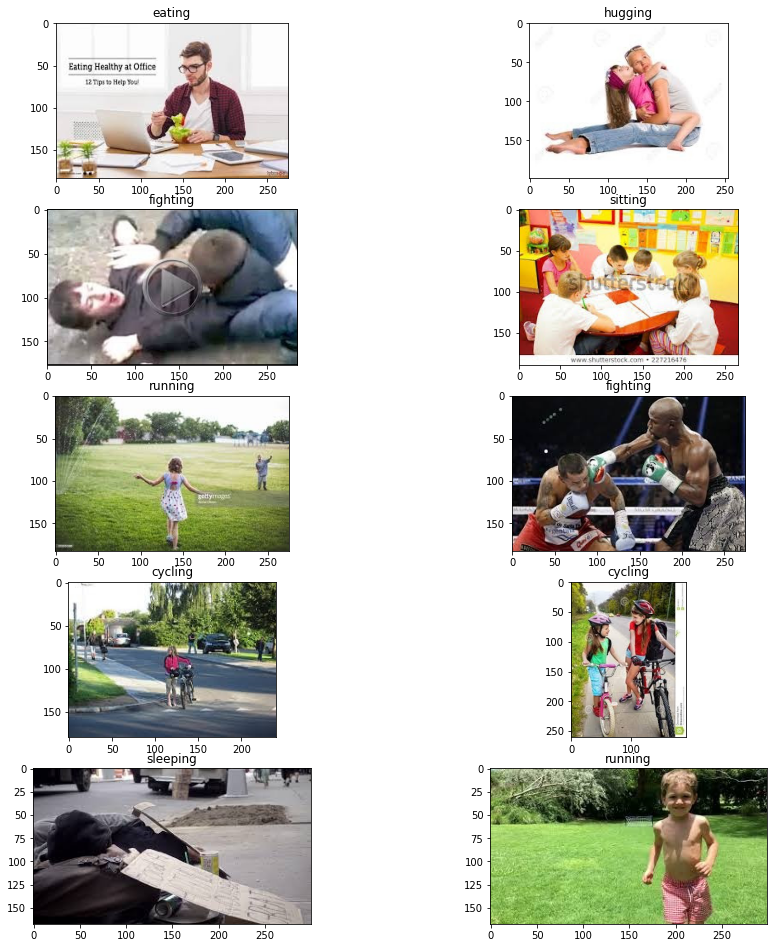

In [13]:
display_random(10)